Regression Function: Overhead(s) = 6.3331e-12 * TotalThreads + 3.7808e-06


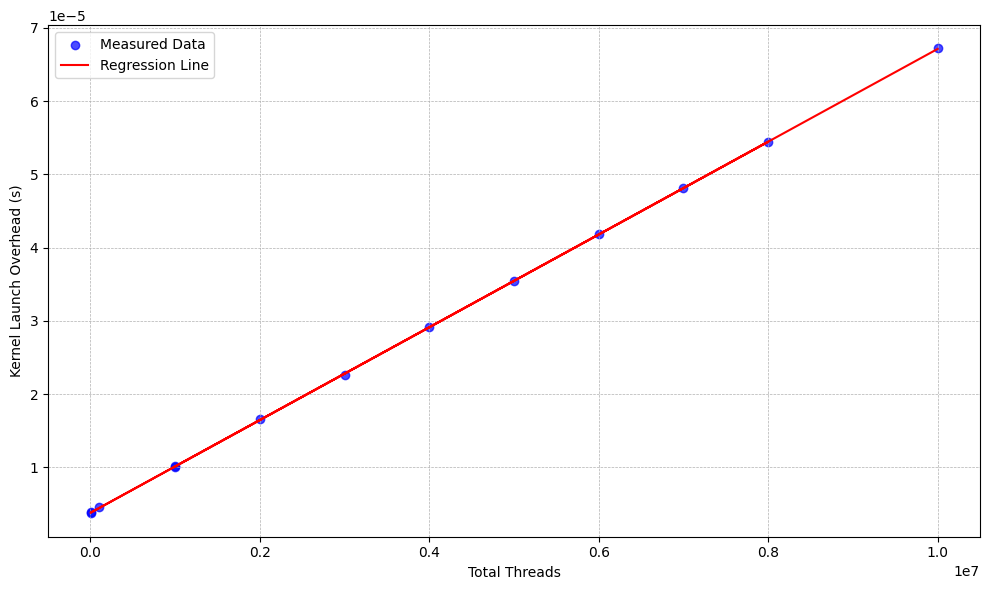

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

file_path = "kernel_launch_overhead.csv" 
data = pd.read_csv(file_path)

data.columns = ["NumThreads", "Overhead(s)"]
data["NumThreads"] = data["NumThreads"].astype(float)  
data["Overhead(s)"] = data["Overhead(s)"].astype(float)

X = data["NumThreads"].values.reshape(-1, 1)  
y = data["Overhead(s)"].values  

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Regression Function: Overhead(s) = {slope:.4e} * TotalThreads + {intercept:.4e}")

plt.figure(figsize=(10, 6))
plt.scatter(data["NumThreads"], data["Overhead(s)"], color='blue', label="Measured Data", alpha=0.7)
plt.plot(data["NumThreads"], slope * data["NumThreads"] + intercept, color='red', label="Regression Line")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Total Threads")
plt.ylabel("Kernel Launch Overhead (s)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
